The examples below have been bundled together & posted because both aspects are incomplete and inconclusive.

1. Incomplete and inconclusive analysis about amenities which values most that attract visitor. Here my analysis remain incomplete. I am planning on working on it after the submission. This analysis demanded most of my time so far. I have pretty good idea as to how to proceed from here, it would take significant amount of time.

2. I've generated pair plots. Although in this case, it doesn't conclude anything with degree of certainity due to size of dataset ("number of columns"). These plots would be helpful once we narrow down "columns".

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from IPython import display
import collections
from time import time
from itertools import chain
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
import seaborn as sns
import qgrid
import datetime
import sympy as S
import scipy

df_listings = pd.read_csv("../seattlelistings.csv")
df_calendar = pd.read_csv("../seattlecalendar.csv")
df_reviews = pd.read_csv("../seattlereviews.csv")

In [2]:
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_colwidth', 2000)

In [5]:
(df_listings.isnull().sum()/len(df_listings)).sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [127]:
x = df_listings['amenities'].str.split(',', expand=True)

In [128]:
x= x.replace('[^\w\s]', '',regex=True)

In [129]:
c=[x[c].unique().tolist() for c in x.columns.values]

In [130]:
c=set(list(chain.from_iterable(c)))

In [131]:
for index in range(30):
    for a in c:
        x[a] = 0

In [132]:
for index in range(30):
    for a in c:
        x[a] += np.where(x[index] == a, 1, 0)

In [133]:
x.drop(columns=[cnt for cnt in range(30)],inplace=True)

In [134]:
df_listings=df_listings.join(x,how='left')

In [135]:
df_listings

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,,Elevator in Building,Hair Dryer,Pets live on this property,Wheelchair Accessible,Cable TV,Washer,Washer Dryer,24Hour Checkin,Free Parking on Premises,Other pets,Fire Extinguisher,Hot Tub,Air Conditioning,FamilyKid Friendly,BuzzerWireless Intercom,Shampoo,Gym,Essentials,TV,Wireless Internet,Cats,Suitable for Events,Lock on Bedroom Door,Pets Allowed,Kitchen,Carbon Monoxide Detector,Laptop Friendly Workspace,Internet,Heating,Hangers,Iron,Smoking Allowed,First Aid Kit,Dryer,Smoke Detector,Indoor Fireplace,Dogs,Breakfast,Pool,Doorman,NaN,Safety Card
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops, bars, and restaurants. There is no","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a duplex) has an open floor plan, bamboo floors, a fully equipped kitchen, a TV, DVD player, basic cable, and a very cozy bedroom with a queen-size bed. The unit sleeps up to four (two in the bedroom and two on the very comfortable fold out couch, linens included) and includes free WiFi and laundry. The apartment opens onto a private deck, complete with it's own BBQ, overlooking a garden and a forest of black bamboo. The Apartment is perfectly-located just one block from the bus lines where you can catch a bus and be downtown Seattle in fifteen minutes or historic Ballard in ten or a quick five-minute walk will bring you to Whole Foods and Peet's Coffee or take a fifteen minute walk to the top of Queen Anne Hill where you will find a variety of eclectic shops

In [6]:
df_listings.drop(columns=[
    'neighborhood_overview', 'notes', 'square_feet', 'weekly_price', 'monthly_price', 'license'],inplace=True)
df_listings['security_deposit']=df_listings['security_deposit'].fillna(0)
df_listings['cleaning_fee']=df_listings['cleaning_fee'].fillna(0)
unique_cols=[col for col in df_listings.columns.values if df_listings[col].nunique()==1]
df_listings.drop(columns=unique_cols,inplace=True)
url_cols=[col for col in df_listings.columns.values if 'url' in col]
df_listings.drop(columns=url_cols,inplace=True)
host_cols=['host_id', 'host_name', 'host_since', 'host_location', 'host_about', 'host_verifications', 'host_total_listings_count']
df_listings.drop(columns=host_cols,inplace=True)
location_cols=['state', 'city','street','smart_location', 'latitude','longitude']
df_listings.drop(columns=location_cols,inplace=True)


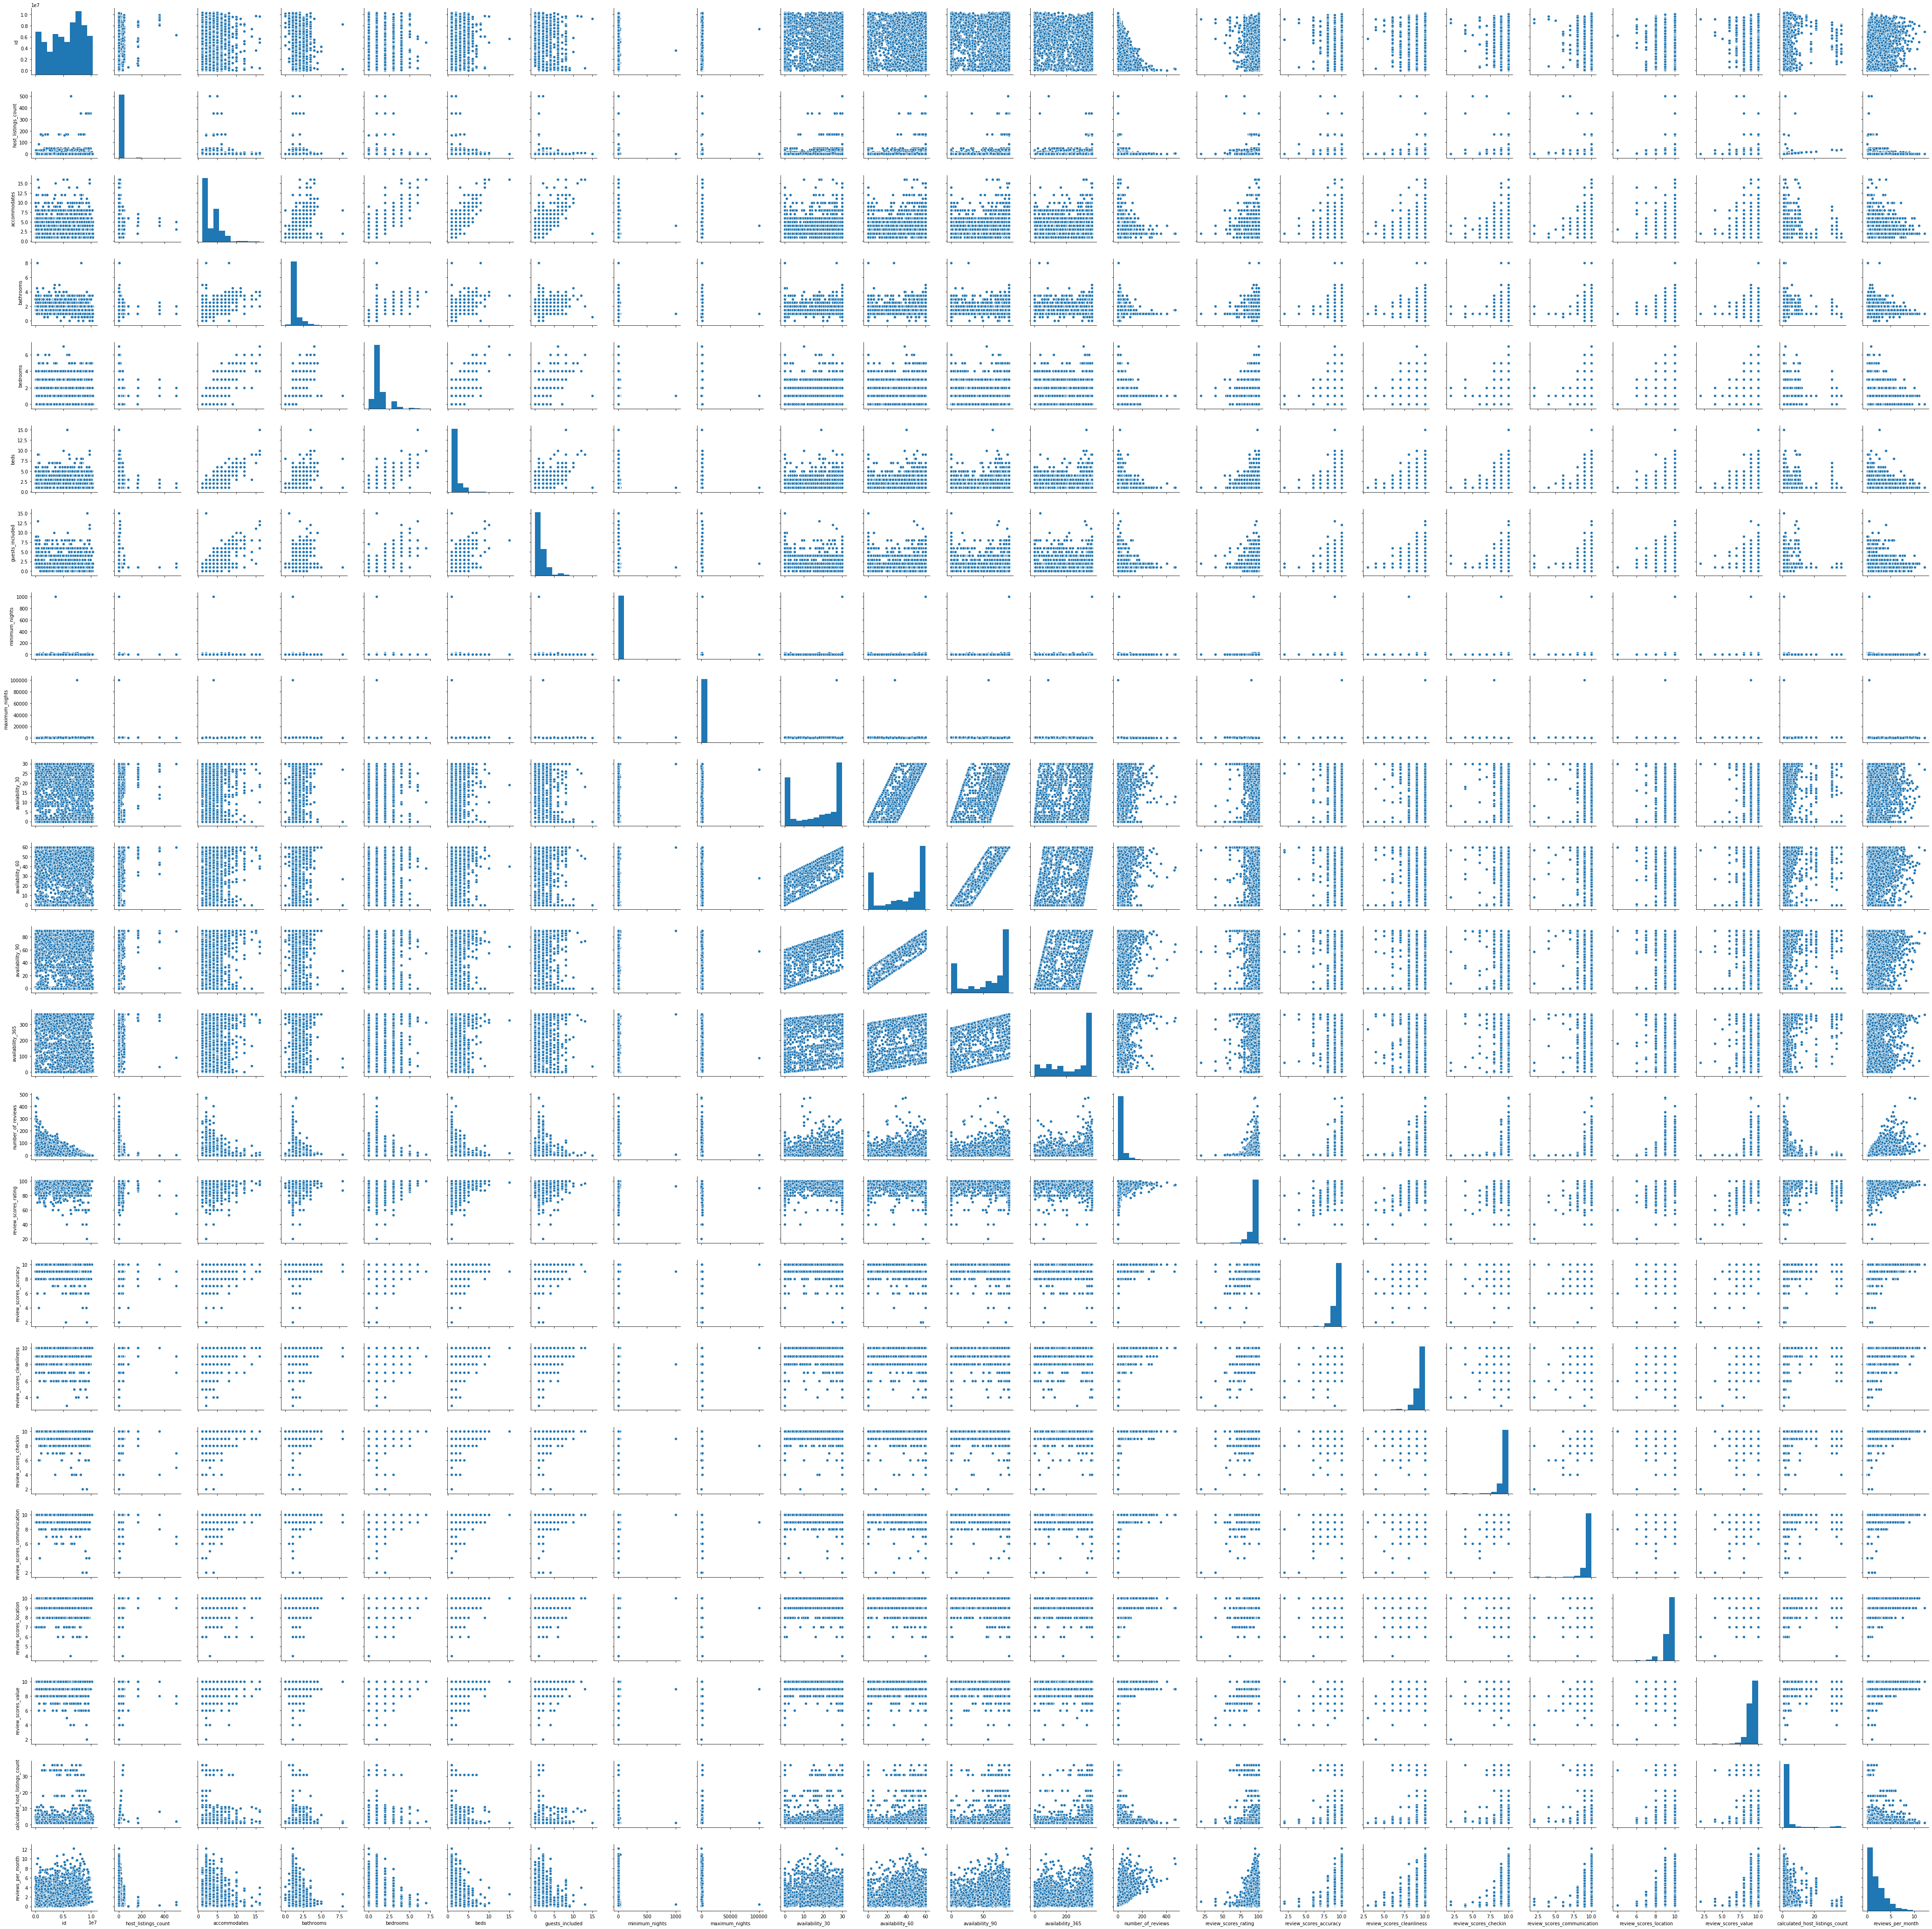

In [8]:
sns_plot = sns.pairplot(df_listings)
sns_plot.savefig("pairplot_listings.png")